### <b>QF603 - Group Project

In [1]:
### import library and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('DATATOMODEL_VER1.csv', index_col=0)
df.head(3)

,Rm,Rf,Rm - Rf,s/h,s/n,s/l,b/h,b/n,b/l,SMB,...,SMBop,s/c,s/n.1,s/a,b/c,b/n.1,b/a,CMA,SMBinv,SMBff5
2017-07-01,0.019349,0.00984,0.009509,-0.006823,0.037507,0.048004,0.034853,0.033627,0.060844,-0.016879,...,-0.017323,0.007202,0.029355,0.045265,0.001347,0.041722,0.083143,-0.059930,-0.014796,-0.016333
2017-08-01,0.000546,0.00906,-0.008514,0.057953,0.033564,0.008137,0.001316,0.031167,0.006898,0.020091,...,0.014664,0.035248,0.029352,0.036674,-0.001838,0.033888,0.006284,-0.004774,0.020980,0.018578
2017-09-01,0.019303,0.00954,0.009763,0.029443,0.035627,0.040432,0.004211,0.042996,-0.021260,0.026519,...,0.025653,0.084872,0.019591,0.007206,0.029250,0.015143,-0.007734,0.057325,0.025004,0.025725


#### 1.) Variance Inflation Factor (VIF)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# For CAPM model - There are only 1 variable - VIF test is not required
# For FF3 model - There are 3 variable (Rm - Rf, SMB and HML)
FF3_factors = df[['Rm - Rf','SMB','HML']]
CH4_factors = df[['Rm - Rf','SMB','HML','MOM']]
FF5_factors = df[['Rm - Rf','SMBff5','HML','CMA','RMW']]

X1 = add_constant(FF3_factors)
X2 = add_constant(CH4_factors)
X3 = add_constant(FF5_factors)

Result1 = pd.Series([variance_inflation_factor(X1.values,i)\
    for i in range(X1.shape[1])], index = X1.columns)
Result2 = pd.Series([variance_inflation_factor(X2.values,i)\
    for i in range(X2.shape[1])], index = X2.columns)
Result3 = pd.Series([variance_inflation_factor(X3.values,i)\
    for i in range(X3.shape[1])], index = X3.columns)

# To test by other approach
ck = np.column_stack([FF3_factors['Rm - Rf'],FF3_factors['SMB'],FF3_factors['HML']])
cc = sp.corrcoef(ck, rowvar = False)
VIF = np.linalg.inv(cc)
Result1_2 = VIF.diagonal()

ck = np.column_stack([CH4_factors['Rm - Rf'],CH4_factors['SMB'],CH4_factors['HML'],CH4_factors['MOM']])
cc = sp.corrcoef(ck, rowvar = False)
VIF = np.linalg.inv(cc)
Result2_2 = VIF.diagonal()

ck = np.column_stack([FF5_factors['Rm - Rf'],FF5_factors['SMBff5'],FF5_factors['HML'],FF5_factors['CMA'],FF5_factors['RMW']])
cc = sp.corrcoef(ck, rowvar = False)
VIF = np.linalg.inv(cc)
Result3_2 = VIF.diagonal()

# Display result for VIF of FF3 model
print ('>>>>> For FF3')
display(Result1)
display(Result1_2)

print('>>>>> For CH4')
display(Result2)
display(Result2_2)

print('>>>>> For FF5')
display(Result3)
display(Result3_2)

>>>>> For FF3


const      1.290236
Rm - Rf    1.111106
SMB        1.074776
HML        1.113859
dtype: float64

array([1.11110575, 1.07477645, 1.11385903])

>>>>> For CH4


const      1.697195
Rm - Rf    1.227882
SMB        1.406231
HML        1.288809
MOM        1.710351
dtype: float64

array([1.22788156, 1.40623099, 1.28880891, 1.7103512 ])

>>>>> For FF5


const      1.360708
Rm - Rf    1.123050
SMBff5     1.324799
HML        1.835012
CMA        2.241491
RMW        1.219689
dtype: float64

array([1.12305019, 1.32479907, 1.83501185, 2.24149087, 1.21968868])

#### 2.) Performing Ordinary Least Squared

In [2]:
df.columns

Index(['Rm', 'Rf', 'Rm - Rf', 's/h', 's/n', 's/l', 'b/h', 'b/n', 'b/l', 'SMB',
       'HML', 's/lo', 's/wi', 'b/lo', 'b/wi', 'MOM', 's/w', 's/m', 's/r',
       'b/w', 'b/m', 'b/r', 'RMW', 'SMBop', 's/c', 's/n.1', 's/a', 'b/c',
       'b/n.1', 'b/a', 'CMA', 'SMBinv', 'SMBff5'],
      dtype='object')

In [3]:
df2 = pd.read_excel('to_be_used_as_ri.xlsx')
df2.head()

,s/h,s/n,s/l,b/h,b/n,b/l,s/w,s/m,s/r,b/w,b/m,b/r,s/c,s/n.1,s/a,b/c,b/n.1,b/a
0,-0.006823,0.037507,0.048004,0.034853,0.033627,0.060844,0.001259,0.046429,0.027567,0.061021,0.039086,0.027118,0.007202,0.029355,0.045265,0.001347,0.041722,0.083143
1,0.057953,0.033564,0.008137,0.001316,0.031167,0.006898,0.041109,0.054793,-0.004414,0.012839,0.010069,0.024588,0.035248,0.029352,0.036674,-0.001838,0.033888,0.006284
2,0.029443,0.035627,0.040432,0.004211,0.042996,-0.021260,0.035808,0.023712,0.050564,0.000480,0.024333,0.008312,0.084872,0.019591,0.007206,0.029250,0.015143,-0.007734
3,0.045635,0.076413,0.034361,0.009909,0.033822,0.038018,0.039733,0.092639,0.017797,0.034505,0.030409,0.018148,0.023522,0.047504,0.096502,0.000773,0.049217,0.025837
4,0.046111,0.051473,0.096173,0.044712,0.015060,-0.015718,0.082501,0.027576,0.092872,-0.002596,0.029643,0.011400,0.128518,0.028132,0.046084,0.056122,0.004647,-0.012709


In [4]:
import statsmodels.api as sm
col_name = df2.columns

#For CAPM the explanatory variables is Rm - Rf
X = df['Rm - Rf'].values
X = sm.add_constant(X)
CAPM_models = {}
for i in range(df2.shape[1]):
    y = df2.iloc[:,i]
    model = sm.OLS(y,X).fit()
    CAPM_models[col_name[i]] = model

#For FF3 the explanatory variables are Rm - Rf, SMB and HML
X1 = df['Rm - Rf']
X2 = df['SMB']
X3 = df['HML']
X = np.column_stack((X1,X2,X3))
X = sm.add_constant(X)
FF3_models = {}
for i in range(df2.shape[1]):
    y = df2.iloc[:,i]
    model = sm.OLS(y,X).fit()
    FF3_models[col_name[i]] = model


#For CH4 the explanatory variables are Rm - Rf, SMB, HML and MOM
X1 = df['Rm - Rf']
X2 = df['SMB']
X3 = df['HML']
X4 = df['MOM']
X = np.column_stack((X1,X2,X3,X4))
X = sm.add_constant(X)
CH4_models = {}
for i in range(df2.shape[1]):
    y = df2.iloc[:,i]
    model = sm.OLS(y,X).fit()
    CH4_models[col_name[i]] = model


#For FF5 the explanatory variables are Rm - Rf, SMB, HML, CMA and RMW
X1 = df['Rm - Rf']
X2 = df['SMBff5']
X3 = df['HML']
X4 = df['CMA']
X5 = df['RMW']
X = np.column_stack((X1,X2,X3,X4,X5))
X = sm.add_constant(X)
FF5_models = {}
for i in range(df2.shape[1]):
    y = df2.iloc[:,i]
    model = sm.OLS(y,X).fit()
    FF5_models[col_name[i]] = model


#### 3.) Performing ACF

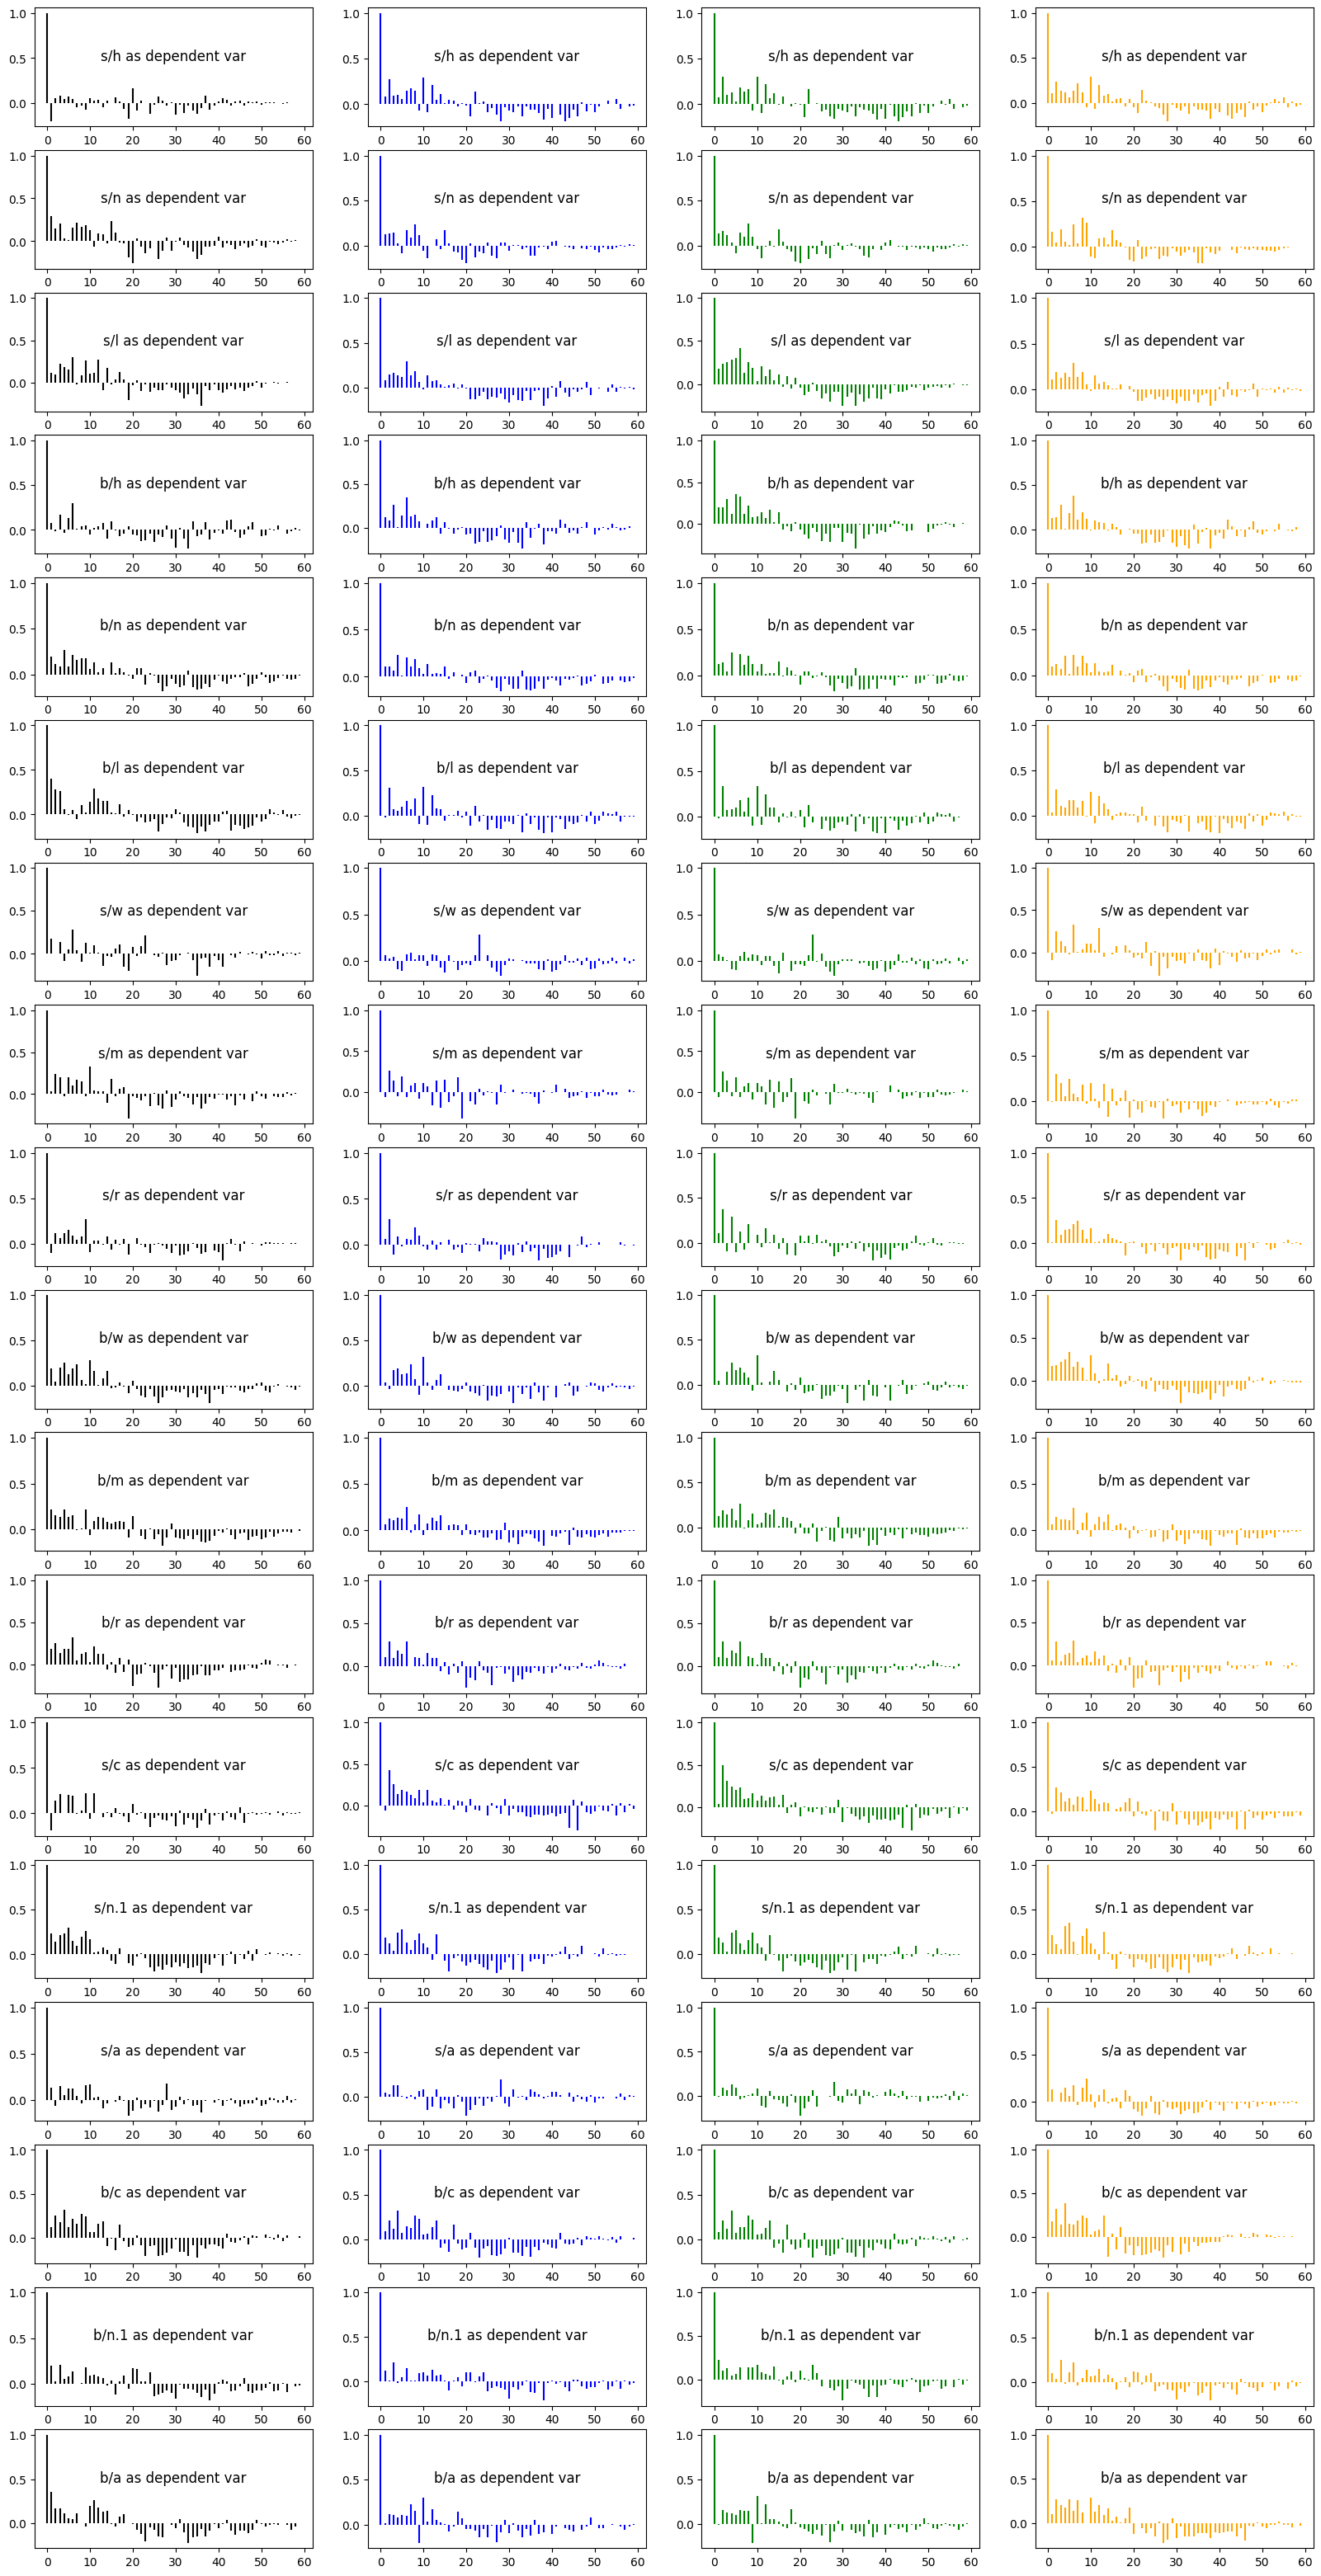

In [6]:
from statsmodels.tsa.stattools import acf

num_rows, num_cols = 18,4
fig, axes = plt.subplots(num_rows, num_cols, figsize = (20,40))

#CAPM
for i in range(len(df2.columns)):
    row = i
    col = 0
    residuals = CAPM_models[df2.columns[i]].resid
    lags = len(residuals) - 1
    acf_values = acf(residuals, nlags=lags)
    axes[row, col].stem(range(0, lags + 1), acf_values, basefmt=" ",linefmt="k-" , markerfmt="", use_line_collection=True)
    title_text = df2.columns[i] + ' as dependent var'
    axes[row, col].set_title(title_text, y=0.5)

#FF3
for i in range(len(df2.columns)):
    row = i
    col = 1
    residuals = FF3_models[df2.columns[i]].resid
    lags = len(residuals) - 1
    acf_values = acf(residuals, nlags=lags)
    axes[row, col].stem(range(0, lags + 1), acf_values, basefmt=" ",linefmt="blue" , markerfmt="", use_line_collection=True)
    title_text = df2.columns[i] + ' as dependent var'
    axes[row, col].set_title(title_text, y=0.5)

#CH4
for i in range(len(df2.columns)):
    row = i
    col = 2
    residuals = CH4_models[df2.columns[i]].resid
    lags = len(residuals) - 1
    acf_values = acf(residuals, nlags=lags)
    axes[row, col].stem(range(0, lags + 1), acf_values, basefmt=" ",linefmt="green" , markerfmt="", use_line_collection=True)
    title_text = df2.columns[i] + ' as dependent var'
    axes[row, col].set_title(title_text, y=0.5)

#FF5
for i in range(len(df2.columns)):
    row = i
    col = 3
    residuals = FF5_models[df2.columns[i]].resid
    lags = len(residuals) - 1
    acf_values = acf(residuals, nlags=lags)
    axes[row, col].stem(range(0, lags + 1), acf_values, basefmt=" ",linefmt="orange" , markerfmt="", use_line_collection=True)
    title_text = df2.columns[i] + ' as dependent var'
    axes[row, col].set_title(title_text, y=0.5)

plt.show()


#### 4.) Performing BG-test

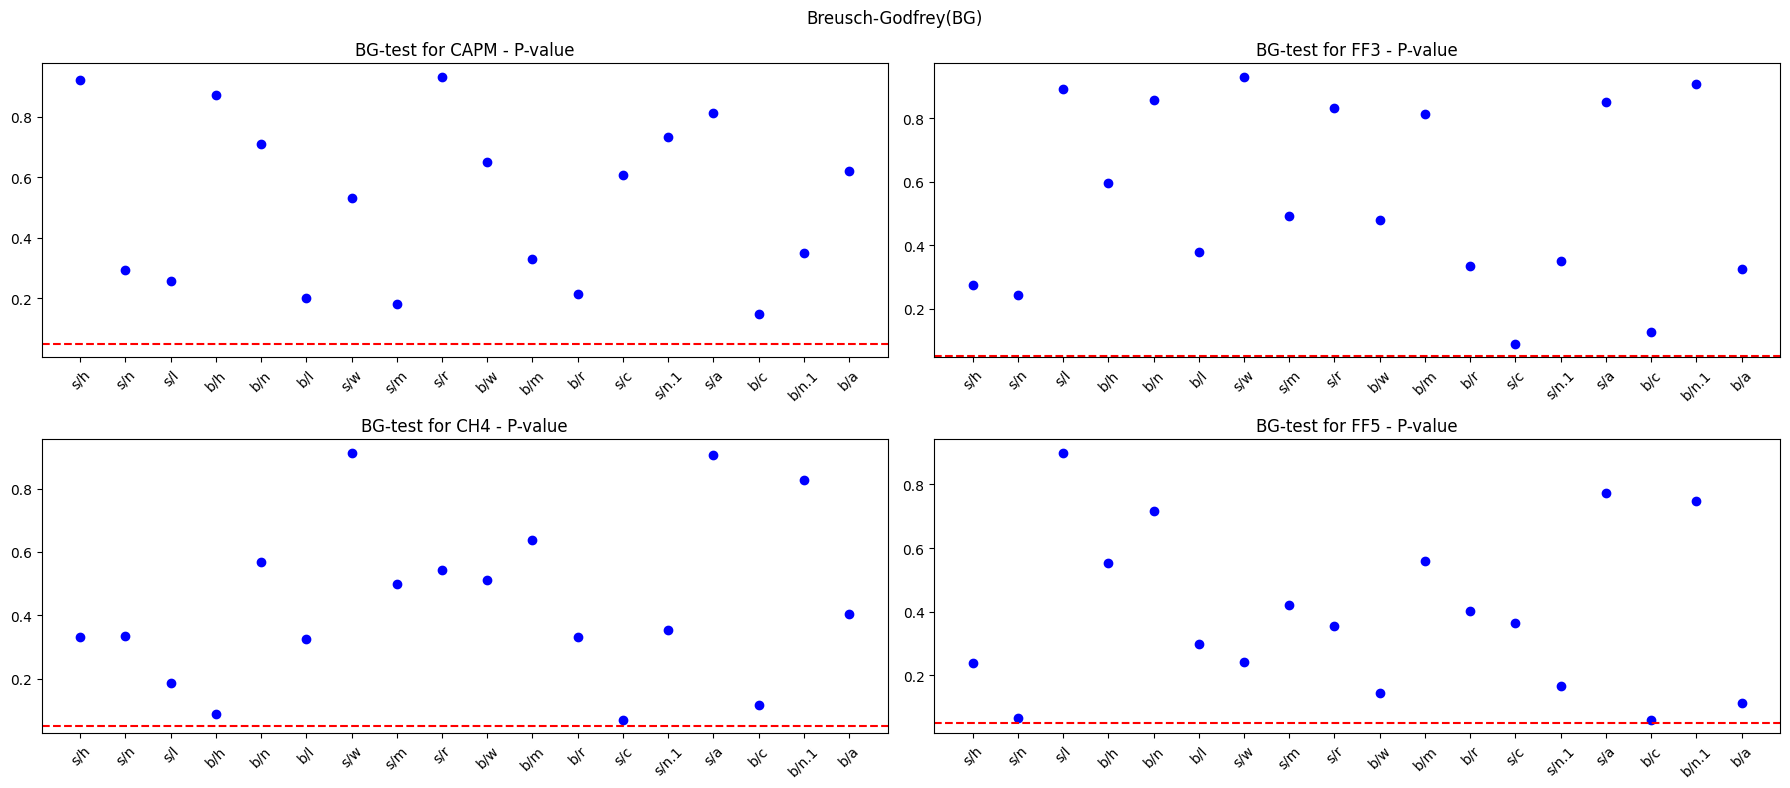

In [182]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

#CAPM
CAPM_BGpvalue = []
for i in range(len(df2.columns)):
    model = CAPM_models[df2.columns[i]]
    bg_test_result = acorr_breusch_godfrey(model, nlags=20)
    CAPM_BGpvalue.append(bg_test_result[1])

#FF3
FF3_BGpvalue = []
for i in range(len(df2.columns)):
    model = FF3_models[df2.columns[i]]
    bg_test_result = acorr_breusch_godfrey(model, nlags=20)
    FF3_BGpvalue.append(bg_test_result[1])

#CH4
CH4_BGpvalue = []
for i in range(len(df2.columns)):
    model = CH4_models[df2.columns[i]]
    bg_test_result = acorr_breusch_godfrey(model, nlags=20)
    CH4_BGpvalue.append(bg_test_result[1])

#FF5
FF5_BGpvalue = []
for i in range(len(df2.columns)):
    model = FF5_models[df2.columns[i]]
    bg_test_result = acorr_breusch_godfrey(model, nlags=20)
    FF5_BGpvalue.append(bg_test_result[1])

#plot
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

axes[0, 0].scatter(list(df2.columns), CAPM_BGpvalue, c='b', marker='o')
axes[0, 0].set_title('BG-test for CAPM - P-value')
axes[0, 0].axhline(y=0.05, color='red', linestyle='--')

axes[0, 1].scatter(list(df2.columns), FF3_BGpvalue, c='b', marker='o')
axes[0, 1].set_title('BG-test for FF3 - P-value')
axes[0, 1].axhline(y=0.05, color='red', linestyle='--')

axes[1, 0].scatter(list(df2.columns), CH4_BGpvalue, c='b', marker='o')
axes[1, 0].set_title('BG-test for CH4 - P-value')
axes[1, 0].axhline(y=0.05, color='red', linestyle='--')

axes[1, 1].scatter(list(df2.columns), FF5_BGpvalue, c='b', marker='o')
axes[1, 1].set_title('BG-test for FF5 - P-value')
axes[1, 1].axhline(y=0.05, color='red', linestyle='--')

for ax in axes.flat:
    ax.set_xticklabels(list(df2.columns),rotation=45)
fig.suptitle('Breusch-Godfrey(BG)')
plt.tight_layout()
plt.show()

#### 5.) Collect and Pvalue of F-Stat and Adjusted R2

In [188]:
# CAPM model:
CAPM_f_and_R = {}
for port, model in CAPM_models.items():
    CAPM_f_and_R[port] = {}
    CAPM_f_and_R[port]['Pval for Fstat'] = model.f_pvalue
    CAPM_f_and_R[port]['Adj R2'] = model.rsquared_adj
    CAPM_f_and_R[port]['BIC'] = model.bic
    CAPM_f_and_R[port]['Condition number'] = model.condition_number

FF3_f_and_R = {}
for port, model in FF3_models.items():
    FF3_f_and_R[port] = {}
    FF3_f_and_R[port]['Pval for Fstat'] = model.f_pvalue
    FF3_f_and_R[port]['Adj R2'] = model.rsquared_adj
    FF3_f_and_R[port]['BIC'] = model.bic
    FF3_f_and_R[port]['Condition number'] = model.condition_number

CH4_f_and_R = {}
for port, model in CH4_models.items():
    CH4_f_and_R[port] = {}
    CH4_f_and_R[port]['Pval for Fstat'] = model.f_pvalue
    CH4_f_and_R[port]['Adj R2'] = model.rsquared_adj
    CH4_f_and_R[port]['BIC'] = model.bic
    CH4_f_and_R[port]['Condition number'] = model.condition_number

FF5_f_and_R = {}
for port, model in FF5_models.items():
    FF5_f_and_R[port] = {}
    FF5_f_and_R[port]['Pval for Fstat'] = model.f_pvalue
    FF5_f_and_R[port]['Adj R2'] = model.rsquared_adj
    FF5_f_and_R[port]['BIC'] = model.bic
    FF5_f_and_R[port]['Condition number'] = model.condition_number

In [192]:
# Display the result

pd.DataFrame(FF5_f_and_R)

,s/h,s/n,s/l,b/h,b/n,b/l,s/w,s/m,s/r,b/w,b/m,b/r,s/c,s/n.1,s/a,b/c,b/n.1,b/a
Pval for Fstat,1.332364e-25,3.101448e-23,7.309304e-28,4.179710e-16,1.218819e-22,8.027826e-23,3.100238e-27,1.729048e-22,2.451342e-23,1.152743e-19,1.039718e-19,8.000021e-24,1.027146e-21,3.617251e-27,2.902631e-28,4.882335e-25,8.702608e-19,5.044224e-22
Adj R2,8.894411e-01,8.645268e-01,9.089234e-01,7.494651e-01,8.574263e-01,8.596316e-01,9.038908e-01,8.555526e-01,8.657109e-01,8.157999e-01,8.165102e-01,8.712056e-01,8.456119e-01,9.033373e-01,9.120004e-01,8.839588e-01,8.013098e-01,8.496595e-01
BIC,-2.513792e+02,-2.735613e+02,-2.698972e+02,-2.721861e+02,-2.732750e+02,-2.535059e+02,-2.723411e+02,-2.695931e+02,-2.347574e+02,-2.568580e+02,-2.621991e+02,-2.849067e+02,-2.361107e+02,-2.793508e+02,-2.820659e+02,-2.992717e+02,-2.649825e+02,-2.515481e+02
Condition number,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01,4.673862e+01
